# Задания 4-5: Применение дискретного ряда Фурье для решения методом сетокоднородного уравнения теплопроводности

In [85]:
import numpy as np
from numpy.typing import NDArray
from scipy.integrate import quad
from scipy.optimize import fmin
from functools import cache
from typing import Callable, Literal
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import Latex, Markdown, display
import warnings
# warnings.filterwarnings('default')

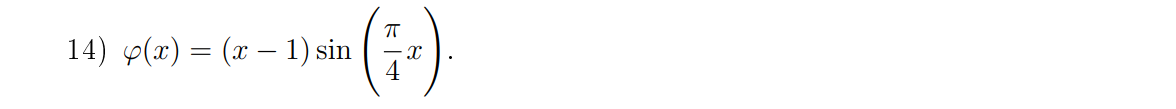

In [2]:
psi = lambda x, p : np.sqrt(2) * np.sin(p * np.pi * x)
phi = lambda x : (x - 1) * np.sin(x * np.pi / 4)

In [87]:
def df_x_t(u: Callable) -> DataFrame:
    X = np.linspace(0, 1, 6)
    labels = ["0", "T/5", "2T/5", "3T/5", "4T/5", "T"]
    T = 100
    d = {}
    for i in range(len(labels)):
        d[labels[i]] = [u(x, i * T / len(labels)) for x in X]
    return DataFrame(d, index=X).T

In [88]:
# Аналитическое решение через ряд Фурье
n_fourier_series = 150
c = np.array([quad(lambda x: psi(x, p) * phi(x), 0, 1)[0] for p in range(n_fourier_series)])
u_f = lambda x, t : np.sqrt(2) * np.sum(
    [c[p] * np.exp(-np.pi**2 * p**2 * t) * np.sin(p * np.pi * x) for p in range(n_fourier_series)]
)

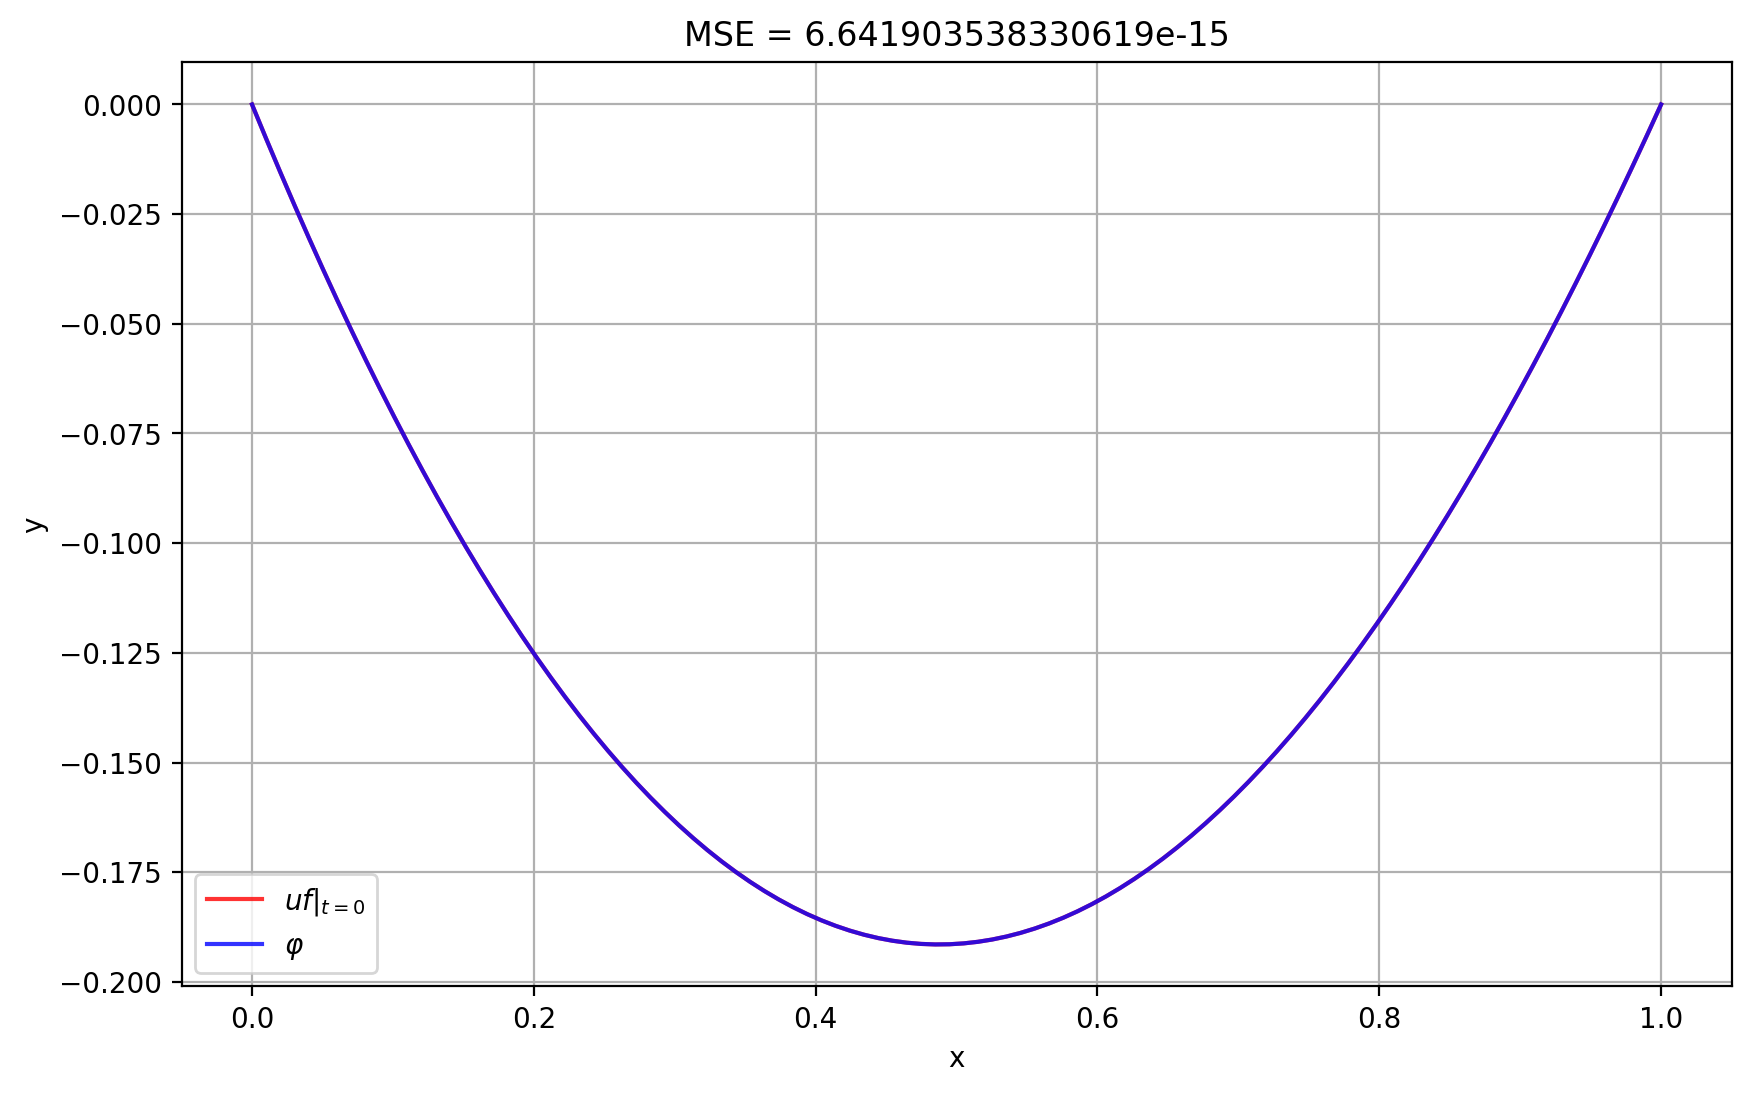

In [89]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
x = np.linspace(0, 1, 100)
UF = [u_f(_, 0) for _ in x]
PHI = phi(x)
plt.plot(x, UF, color="red", label=r"$uf|_{t=0}$", alpha=0.8)
plt.plot(x, phi(x), color="blue", label=r"$\varphi$", alpha=0.8)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.set_title(f"MSE = {np.square(UF - PHI).mean()}")
ax.grid()
plt.show()

In [92]:
print("Table 1 for uf")
df_x_t(u_f)

Table 1 for uf


,0.0,0.2,0.4,0.6,0.8,1.0
0,0.0,-1.251475e-01,-1.854102e-01,-1.815962e-01,-1.175570e-01,-2.780264e-17
T/5,0.0,-4.213648e-73,-6.817826e-73,-6.817826e-73,-4.213648e-73,-8.779108e-89
2T/5,0.0,-1.534898e-144,-2.483516e-144,-2.483516e-144,-1.534898e-144,-3.197949e-160
3T/5,0.0,-5.591143e-216,-9.046659e-216,-9.046659e-216,-5.591143e-216,-1.164911e-231
4T/5,0.0,-2.036675e-287,-3.295409e-287,-3.295409e-287,-2.036675e-287,-4.243399e-303
T,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [93]:
# Аналитическое решение через дискретный ряд Фурье (ДРФ)

N = 20
h = 1 / N
T = 0.1
grid = np.linspace(0, 1, N+1)

c_discr = np.array([
    np.sqrt(2) * h * np.sum([phi(x) * np.sin(p * np.pi * x) for x in grid]) for p in range(1, N)
])

udfs = lambda x, t:  np.sqrt(2) * np.sum([
    c_discr[p-1] * np.exp(-np.pi**2 * p**2 * t) * np.sin(p * np.pi * x) for p in range(1, N)
])


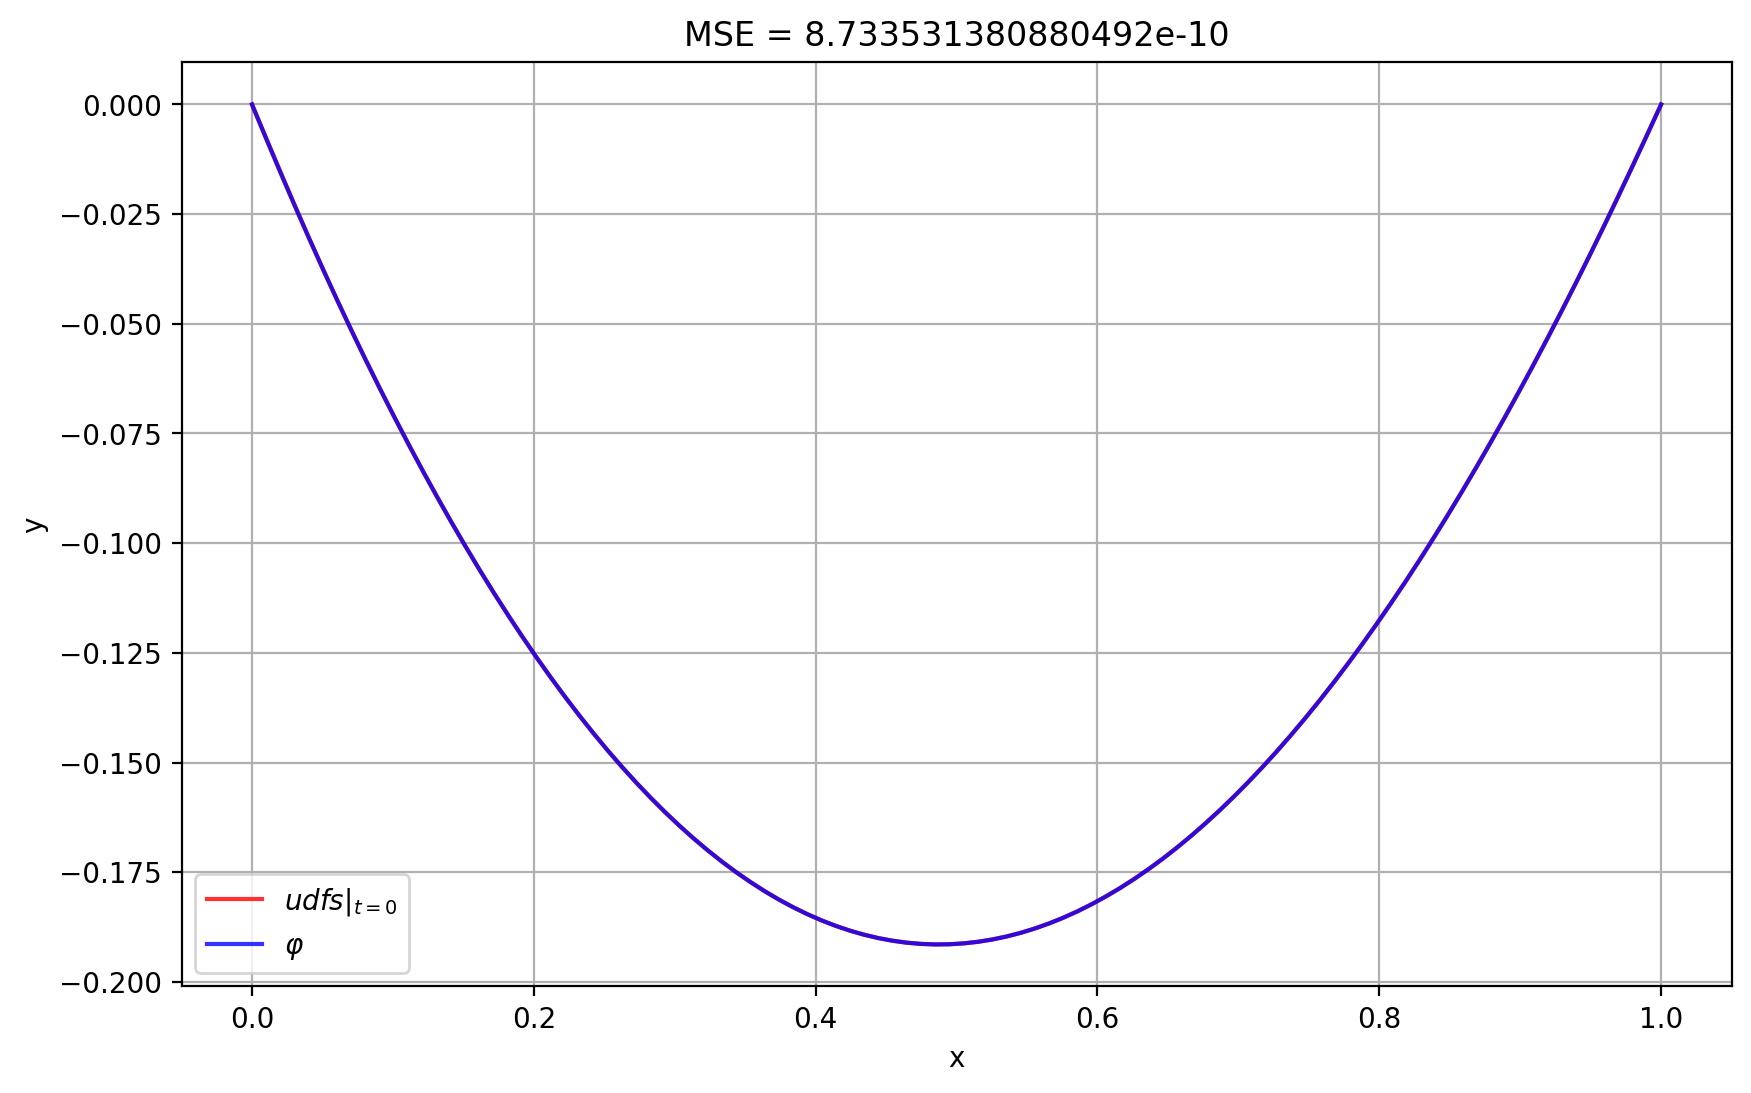

In [94]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
x = np.linspace(0, 1, 100)
UD = [udfs(_, 0) for _ in x]
PHI = phi(x)
plt.plot(x, UD, color="red", label=r"$udfs|_{t=0}$", alpha=0.8)
plt.plot(x, PHI, color="blue", label=r"$\varphi$", alpha=0.8)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.set_title(f"MSE = {np.square(UD - PHI).mean()}")
ax.grid()
plt.show()

In [95]:
print("Table 1 for udfs")
df_x_t(udfs)

Table 1 for udfs


,0.0,0.2,0.4,0.6,0.8,1.0
0,0.0,-1.251476e-01,-1.854102e-01,-1.815962e-01,-1.175571e-01,-2.730633e-17
T/5,0.0,-4.213638e-73,-6.817810e-73,-6.817810e-73,-4.213638e-73,-8.779089e-89
2T/5,0.0,-1.534894e-144,-2.483511e-144,-2.483511e-144,-1.534894e-144,-3.197942e-160
3T/5,0.0,-5.591130e-216,-9.046639e-216,-9.046639e-216,-5.591130e-216,-1.164908e-231
4T/5,0.0,-2.036671e-287,-3.295402e-287,-3.295402e-287,-2.036671e-287,-4.243390e-303
T,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [96]:
print("Table 1 for |uf - udfs|")
df_x_t(lambda x, t: abs(u_f(x, t) - udfs(x, t)))

Table 1 for |uf - udfs|


,0.0,0.2,0.4,0.6,0.8,1.0
0,0.0,4.958190e-08,2.836243e-08,2.550709e-08,3.749797e-08,4.963131e-19
T/5,0.0,9.413976e-79,1.523213e-78,1.523213e-78,9.413976e-79,1.961396e-94
2T/5,0.0,3.429211e-150,5.548580e-150,5.548580e-150,3.429211e-150,7.144740e-166
3T/5,0.0,1.249152e-221,2.021171e-221,2.021171e-221,1.249152e-221,2.602601e-237
4T/5,0.0,4.550264e-293,7.362481e-293,7.362481e-293,4.550264e-293,9.480445e-309
T,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [99]:
def calc_weighted(h, tau, sigma, verbose=True) -> Callable:
    N = int(1 / h)

    def is_stable():
        if sigma >= 0.5:
            return True
        if sigma == 0:
            return tau / (h**2) <= 0.5
        return tau <= h**2 / (2 * (1 - 2 * sigma))
    
    if verbose:
        print(f"h={h}, tau={tau}, sigma={sigma}, stable: {is_stable()}")

    lambda_ = np.array([
        (1 - 4 * (1 - sigma) * tau / h**2 * (np.sin(p * np.pi * h / 2))**2) / (1 + 4 * sigma * tau / h**2 * (np.sin(p * np.pi * h / 2))**2) for p in range(1, N)
    ])

    u_w = lambda x, t:   np.sqrt(2) *  np.sum([
        c_discr[p-1] * (lambda_[p-1]**(t / tau)) * np.sin(p * np.pi * x) for p in range(1, N)
    ])

    return u_w

In [103]:
d = {}
h = .2, .1, .05, .05
tau = .02, .005, .00125, .005
sigma = lambda h_, t_: (0, 1, .5, .5 - h_**2 / (12 * t_))
sigma_labels = "0", "1", "1/2", "1/2 - h²/12τ"

for i in range(len(h)):
    sigmas = sigma(h[i], tau[i])
    label = f"({h[i], tau[i]})"
    d[label] = {}
    for j in range(len(sigmas)):
        N, T = 20, .1
        u_w = calc_weighted(h[i], tau[i], sigmas[j])
        variance = np.max(np.array([
            [abs(udfs(i / N, j / 5 * T) - u_w(i / N, j / 5 * T)) for i in range(N+1)] for j in range(6)
        ]))
        d[label][sigma_labels[j]] = f"{variance:.10f}"

pd.DataFrame(d)

h=0.2, tau=0.02, sigma=0, stable: True
h=0.2, tau=0.02, sigma=1, stable: True
h=0.2, tau=0.02, sigma=0.5, stable: True
h=0.2, tau=0.02, sigma=0.33333333333333326, stable: True
h=0.1, tau=0.005, sigma=0, stable: True
h=0.1, tau=0.005, sigma=1, stable: True
h=0.1, tau=0.005, sigma=0.5, stable: True
h=0.1, tau=0.005, sigma=0.33333333333333326, stable: True
h=0.05, tau=0.00125, sigma=0, stable: True
h=0.05, tau=0.00125, sigma=1, stable: True


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19420\2819975332.py:19: RuntimeWarning: invalid value encountered in scalar power
  c_discr[p-1] * (lambda_[p-1]**(t / tau)) * np.sin(p * np.pi * x) for p in range(1, N)


h=0.05, tau=0.00125, sigma=0.5, stable: True
h=0.05, tau=0.00125, sigma=0.33333333333333326, stable: True
h=0.05, tau=0.005, sigma=0, stable: False
h=0.05, tau=0.005, sigma=1, stable: True
h=0.05, tau=0.005, sigma=0.5, stable: True
h=0.05, tau=0.005, sigma=0.4583333333333333, stable: True


,"((0.2, 0.02))","((0.1, 0.005))","((0.05, 0.00125))","((0.05, 0.005))"
0,nan,nan,nan,nan
1,0.0086820307,0.0023258148,0.0005914479,0.0018915512
1/2,0.0021661302,0.0005807804,0.0001478119,nan
1/2 - h²/12τ,nan,nan,nan,nan


In [104]:
df_x_t(calc_weighted(0.1, 0.02, 0))

h=0.1, tau=0.02, sigma=0, stable: False


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19420\2819975332.py:19: RuntimeWarning: invalid value encountered in scalar power
  c_discr[p-1] * (lambda_[p-1]**(t / tau)) * np.sin(p * np.pi * x) for p in range(1, N)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19420\2819975332.py:19: RuntimeWarning: overflow encountered in scalar power
  c_discr[p-1] * (lambda_[p-1]**(t / tau)) * np.sin(p * np.pi * x) for p in range(1, N)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19420\2819975332.py:19: RuntimeWarning: invalid value encountered in scalar multiply
  c_discr[p-1] * (lambda_[p-1]**(t / tau)) * np.sin(p * np.pi * x) for p in range(1, N)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,0.0,0.2,0.4,0.6,0.8,1.0
0,0.0,-0.125016,-0.185324,-0.181518,-0.117456,-2.670060e-17
T/5,NaN,NaN,NaN,NaN,NaN,NaN
2T/5,NaN,NaN,NaN,NaN,NaN,NaN
3T/5,NaN,NaN,NaN,NaN,NaN,NaN
4T/5,NaN,NaN,NaN,NaN,NaN,NaN
T,NaN,NaN,NaN,NaN,NaN,NaN
